In [14]:
from nfl import process #saved as a package the make_feature function defined in previous notebook
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer, RobustScaler, StandardScaler

from sklearn.linear_model import LinearRegression, ElasticNetCV

from sklearn.grid_search import GridSearchCV

from time import ctime

from sklearn.cross_validation import cross_val_score

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split, ShuffleSplit
from sklearn.ensemble import ExtraTreesRegressor

import statsmodels.formula.api as smf
from statsmodels.api import add_constant

from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.svm import SVR, LinearSVR

import scipy.stats as stats
import math

%matplotlib inline

In [2]:
df = pd.read_csv("~/ProjectData/NFL/all_data_10_13_v2.csv", low_memory=False)

In [3]:
np.shape(df)

(88592, 1340)

In [4]:
df.head()

,Unnamed: 0,gid,player,wk,target,team,opponent,fname,lname,pos1,...,tm_o_snpo11,tm_d_snpo11,tm_o_snpd1,tm_d_snpd1,tm_o_snpd3,tm_d_snpd3,tm_o_snpd6,tm_d_snpd6,tm_o_snpd11,tm_d_snpd11
0,0,3999,AA-0025,1,19.4,DET,SD,Ameer,Abdullah,RB,...,66.000000,66.272727,79.0,47.0,69.000000,61.000000,67.333333,62.500000,66.272727,66.000000
1,1,4010,AA-0025,2,2.8,DET,MIN,Ameer,Abdullah,RB,...,66.272727,66.727273,65.0,78.0,68.666667,64.000000,67.500000,64.000000,66.727273,66.272727
2,2,4036,AA-0025,3,12.2,DET,DEN,Ameer,Abdullah,RB,...,66.909091,67.000000,64.0,74.0,69.333333,66.333333,66.666667,67.833333,67.000000,66.909091
3,3,4052,AA-0025,4,6.4,DET,SEA,Ameer,Abdullah,RB,...,66.909091,67.272727,65.0,56.0,64.666667,69.333333,66.833333,65.166667,67.272727,66.909091
4,4,4062,AA-0025,5,2.6,DET,ARI,Ameer,Abdullah,RB,...,68.272727,64.363636,46.0,95.0,58.333333,75.000000,63.500000,69.500000,64.363636,68.272727


In [5]:
#te = process.make_feature("TE", 2000, df = df)
#te.head(1)

In [6]:
#qb = process.make_feature("QB", 2000, df = df)
#qb.head(1)

In [3]:
wr = process.make_feature("WR", 2010, df = df)
wr.head(10)

/Users/egorkharakozov/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,gid,player,wk,target,fname,lname,seas,ou,imp_score,height,...,dummy_2,dummy_20,dummy_21,dummy_3,dummy_4,dummy_5,dummy_6,dummy_7,dummy_8,dummy_9
0,2929,TS-2300,1,42.2,Torrey,Smith,2011,-0.500000,0.045455,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2963,TS-2300,3,1.1,Torrey,Smith,2011,-0.416667,0.090909,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2984,TS-2300,4,11.4,Torrey,Smith,2011,0.083333,0.727273,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3007,TS-2300,6,6.2,Torrey,Smith,2011,-0.833333,0.272727,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3024,TS-2300,7,8.7,Torrey,Smith,2011,-0.250000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,3027,TS-2300,8,18.1,Torrey,Smith,2011,-0.416667,-0.500000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,3050,TS-2300,9,7.4,Torrey,Smith,2011,-0.583333,0.272727,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,3064,TS-2300,10,31.5,Torrey,Smith,2011,-0.666667,0.272727,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3076,TS-2300,11,4.3,Torrey,Smith,2011,-1.000000,-0.272727,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3084,TS-2300,12,3.9,Torrey,Smith,2011,-1.083333,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
wr.to_csv("test.csv")

In [12]:
#### DELETE LATER

wr = pd.read_csv("test.csv", low_memory=False)

In [13]:
X, y, frame = process.crop_and_separate(5, 2, wr, "data")

  ### Construct a model tester loop to select the best model fit just based on default hyperparameters

In [15]:
lr = LinearRegression()
en = ElasticNetCV(n_jobs=-1) 
svm = SVR()
et = ExtraTreesRegressor()

algos = {"lr":{"model": lr},"en":{"model": en},  "svm": {"model" : svm}, "et" :{"model": et}}

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)


In [7]:
ss = ShuffleSplit(len(X), 3) #set up a random shuffler for the cross validation

In [7]:
for k, v in algos.iteritems():
    print k

et
en
lr
svm


In [13]:
for k, v in algos.iteritems():
    v["cv_mean_r2"] = cross_val_score(v["model"], X, y, scoring = "r2", cv = ss).mean()
    print "1" , ctime()
    v["model"].fit(X,y)
    print "2" , ctime()
    v["fit_r2"] = v["model"].score(X,y)
    print "3", ctime()
    v["model"].fit(X_train, y_train)
    print "4", ctime()
    v["out_of_sample_r2"] = v["model"].score(X_test,y_test)
    print "5", ctime()
    y_pred = v["model"].predict(X_test)
    print "6", ctime()
    v["out_of_sample_mse"]=mean_squared_error(y_test, y_pred)
   
    #plt.figure(figsize=(10,8))
    #sns.residplot(y_test, y_pred)
    #plt.title(k+" redisual plot")
    #plt.show()
    print "\nfinished with ",ctime(), " ", k,"\n"

1 Fri Oct 14 12:29:13 2016
2 Fri Oct 14 12:29:43 2016
3 Fri Oct 14 12:29:43 2016
4 Fri Oct 14 12:30:02 2016
5 Fri Oct 14 12:30:02 2016
6 Fri Oct 14 12:30:02 2016

finished with  Fri Oct 14 12:30:02 2016   et 



/Users/egorkharakozov/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


1 Fri Oct 14 12:33:41 2016
2 Fri Oct 14 12:34:48 2016
3 Fri Oct 14 12:34:48 2016
4 Fri Oct 14 12:36:18 2016
5 Fri Oct 14 12:36:18 2016
6 Fri Oct 14 12:36:18 2016

finished with  Fri Oct 14 12:36:18 2016   en 

1 Fri Oct 14 12:36:24 2016
2 Fri Oct 14 12:36:26 2016
3 Fri Oct 14 12:36:26 2016
4 Fri Oct 14 12:36:27 2016
5 Fri Oct 14 12:36:28 2016
6 Fri Oct 14 12:36:28 2016

finished with  Fri Oct 14 12:36:28 2016   lr 

1 Fri Oct 14 12:40:40 2016
2 Fri Oct 14 12:42:14 2016
3 Fri Oct 14 12:43:44 2016
4 Fri Oct 14 12:44:15 2016
5 Fri Oct 14 12:44:36 2016
6 Fri Oct 14 12:44:57 2016

finished with  Fri Oct 14 12:44:57 2016   svm 



In [14]:
pd.DataFrame(algos)

,en,et,lr,svm
cv_mean_r2,0.206986,0.0691183,-280591,0.0959659
fit_r2,0.227811,1,0.398894,0.168284
model,"ElasticNetCV(alphas=None, copy_X=True, cv=None...","(ExtraTreeRegressor(criterion='mse', max_depth...","LinearRegression(copy_X=True, fit_intercept=Tr...","SVR(C=1.0, cache_size=200, coef0=0.0, degree=3..."
out_of_sample_mse,64.0893,70.4844,3.12494e+20,75.1253
out_of_sample_r2,0.214119,0.1357,-3.83189e+18,0.078791


### Looks like a regularized linear regression model yields already pretty good results. To be rigorous I will gridsearch ET model to finetune parameters given that by default it overfits without a depth cutoff since (r2 =1)

In [76]:
et2 = ExtraTreesRegressor(warm_start=True, n_jobs=-1)

params = {"max_depth": [10,20,50,100, 1000],
          "min_samples_leaf": [1, 5, 10, 20],
          "min_weight_fraction_leaf": list(np.logspace(-3,-2,3))+[0]
         }
    

gset2 = GridSearchCV(et2, params, cv=ss, n_jobs=-1)

In [77]:
gset2.fit(X,y)

GridSearchCV(cv=ShuffleSplit(7823, n_iter=3, test_size=0.1, random_state=None),
       error_score='raise',
       estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
          verbose=0, warm_start=True),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_weight_fraction_leaf': [0.001, 0.0031622776601683794, 0.01, 0], 'max_depth': [10, 20, 50, 100, 1000], 'min_samples_leaf': [1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [80]:
cross_val_score(gset2.best_estimator_, X, y, cv = ss, n_jobs=-1).mean()

0.19176446524364207

In [81]:
gset2.best_params_

{'max_depth': 10, 'min_samples_leaf': 20, 'min_weight_fraction_leaf': 0.01}

### another gridsearch since the parameters were at the edges of our search

In [110]:
et3 = ExtraTreesRegressor(warm_start=True, n_jobs=-1)

params = {"max_depth": [7,10,11,12,14,20],
          "min_samples_leaf": [15,20,30,35,40],
          "min_weight_fraction_leaf": list(np.logspace(-1,-.31,6))
         }
    

gset3 = GridSearchCV(et2, params, cv=ss, n_jobs=-1)

In [111]:
gset3.fit(X,y)

GridSearchCV(cv=ShuffleSplit(7823, n_iter=3, test_size=0.1, random_state=None),
       error_score='raise',
       estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
          verbose=0, warm_start=True),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_weight_fraction_leaf': [0.10000000000000001, 0.13740419750125152, 0.18879913490962935, 0.25941793621188136, 0.35645113342624418, 0.48977881936844619], 'max_depth': [7, 10, 11, 12, 14, 20], 'min_samples_leaf': [15, 20, 30, 35, 40]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [112]:
gset3.best_params_

{'max_depth': 7,
 'min_samples_leaf': 30,
 'min_weight_fraction_leaf': 0.13740419750125152}

In [113]:
cross_val_score(gset3.best_estimator_, X, y, cv = ss, n_jobs=-1).mean()

0.24113061471969369

## Looks like both the random forest and the linear regression models give similiar mean cross validation results. One more test to look at stdev of CV for both the ElasticNet and the RF models

In [26]:
ss2 = ShuffleSplit(len(X), 7)

In [25]:
et4 = ExtraTreesRegressor(max_depth=7,
                          min_samples_leaf= 30, 
                          min_weight_fraction_leaf=0.13740419750125152, 
                          n_estimators=50, n_jobs = -1)

In [118]:
print cross_val_score(gset3.best_estimator_, X, y, cv = ss2, n_jobs=-1).mean()
print cross_val_score(gset3.best_estimator_, X, y, cv = ss2, n_jobs=-1).std()

0.207048307765
0.0203531030349


In [10]:
print cross_val_score(et4, X, y, cv = ss2, n_jobs=-1).mean()
print cross_val_score(et4, X, y, cv = ss2, n_jobs=-1).std()

0.216162155506
0.0116018173201


In [23]:
ss3 = ShuffleSplit(len(X[mask]),5)
en2 = ElasticNetCV(n_jobs=-1, cv = ss3)



#### the things we do for a few bps of r2... given that RF runs considerably faster than elastic net, and for my implementation I will refit the model in an iterative manner I will stick with the RF model when I make the predictions for the past few seasons.

## But first I should just test both predictors for reasonability

In [24]:
test_df = frame

In [25]:
#lets test out of sample on Deandre Hopkins (picked at random) So train on all of the data except for his games
#and then predict his games

mask = (test_df.player != "DH-3950")

et4.fit(X[mask],y[mask])

y_pred = et4.predict(X)


In [26]:
en2.fit(X[mask],y[mask])

y_pred2 = en2.predict(X)

/Users/egorkharakozov/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [27]:
####ADD IN LINEAR AS A "NAIVE" MODEL

linreg = LinearRegression()

linreg.fit(X[mask],y[mask])
y_pred3 = linreg.predict(X)

In [28]:
test_df["pred"] = y_pred
test_df["pred2"] = y_pred2
test_df["pred3"] = y_pred3

In [29]:
dhop = test_df[test_df.player == "DH-3950"]

In [30]:
test_df.tail()

,gid,player,wk,target,fname,lname,seas,ou,imp_score,height,...,dummy_3,dummy_4,dummy_5,dummy_6,dummy_7,dummy_8,dummy_9,pred,pred2,pred3
11138,4172,DH-3950,13,8.2,DeAndre,Hopkins,2015,0.083333,-0.272727,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.657356,17.481003,14.028809
11139,4196,DH-3950,14,17.4,DeAndre,Hopkins,2015,-0.416667,-0.409091,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.708897,16.991018,14.211487
11140,4202,DH-3950,15,27.7,DeAndre,Hopkins,2015,-0.666667,-0.045455,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.645831,17.731869,17.039612
11141,4217,DH-3950,16,15.9,DeAndre,Hopkins,2015,0.166667,0.681818,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.220547,18.726192,17.415375
11142,4235,DH-3950,17,12.9,DeAndre,Hopkins,2015,-0.750000,-0.727273,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.552628,18.556446,13.487274


In [31]:
dhop.head(5)

,gid,player,wk,target,fname,lname,seas,ou,imp_score,height,...,dummy_3,dummy_4,dummy_5,dummy_6,dummy_7,dummy_8,dummy_9,pred,pred2,pred3
11095,3471,DH-3950,1,27.7,DeAndre,Hopkins,2013,-0.250000,0.727273,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.631141,14.568597,18.226013
11096,3476,DH-3950,2,12.0,DeAndre,Hopkins,2013,0.000000,0.227273,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.087971,18.023894,15.387390
11097,3493,DH-3950,3,4.7,DeAndre,Hopkins,2013,-0.500000,-0.363636,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16.403904,15.721163,16.556396
11098,3507,DH-3950,4,4.3,DeAndre,Hopkins,2013,-0.500000,-0.818182,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.066644,13.695945,12.080444
11099,3530,DH-3950,5,6.7,DeAndre,Hopkins,2013,-0.416667,0.454545,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14.121994,12.637655,18.493195


[[ 1.          0.32503076]
 [ 0.32503076  1.        ]] 0.0918460902892
[[ 1.          0.31877344]
 [ 0.31877344  1.        ]] 0.0996101447204
[[ 1.          0.17571864]
 [ 0.17571864  1.        ]] -0.0784091615336


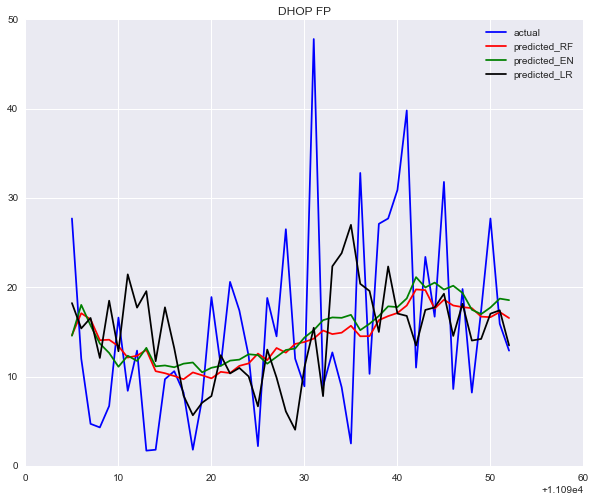

In [32]:
plt.figure(figsize=(10,8))
plt.tick_params()
plt.plot(dhop.target, c= "b", label = "actual")
plt.plot(dhop.pred, c = "r", label = "predicted_RF")
plt.plot(dhop.pred2, c = "g", label = "predicted_EN")
plt.plot(dhop.pred3, c = "k", label = "predicted_LR")
plt.legend(["actual", "predicted_RF", "predicted_EN", "predicted_LR"])
plt.title("DHOP FP")


print np.corrcoef(dhop.target, dhop.pred), r2_score(dhop.target, dhop.pred)
print np.corrcoef(dhop.target, dhop.pred2), r2_score(dhop.target, dhop.pred2)
print np.corrcoef(dhop.target, dhop.pred3), r2_score(dhop.target, dhop.pred3)

### as in the cross val findings, the RF and EN give similiar ressults here whereas LR has much higher variance but not great accuracy. 

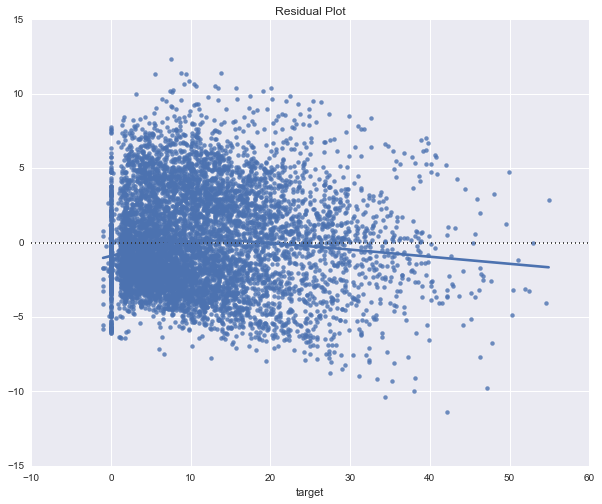

In [41]:
plt.figure(figsize=(10,8))
sns.residplot(test_df.target, y_pred, lowess=1)
plt.title("Residual Plot")


In [66]:
print np.shape(add_constant(test_df.target))
print np.shape(y_pred)


(7823, 2)
(7823,)


pandas.core.frame.DataFrame

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     4446.
Date:                Sat, 15 Oct 2016   Prob (F-statistic):               0.00
Time:                        17:25:19   Log-Likelihood:                -20368.
No. Observations:                7823   AIC:                         4.074e+04
Df Residuals:                    7821   BIC:                         4.075e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          7.7685      0.058    134.287      0.000         7.655     7.882
target         0.2762      0.004     66.676      0.000         0.268     0.284
==============================================================================
Omnibus:                      246.213   Durbin-Watson:                   0.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.470
Skew:                           0.447   Prob(JB):                     8.31e-59
Kurtosis:                       2.859   Cond. No.                         21.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

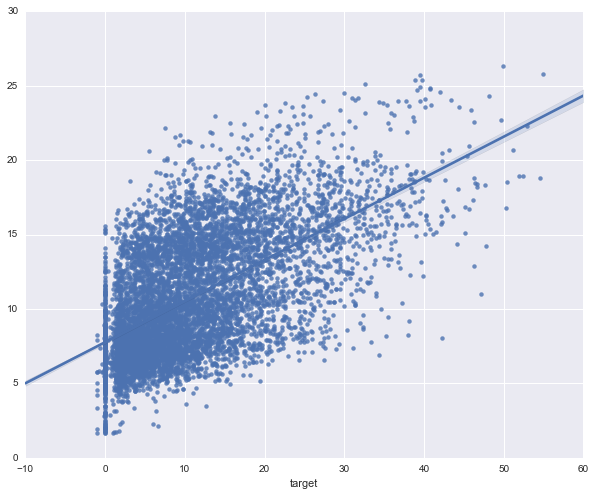

In [70]:

plt.figure(figsize=(10,8))
sns.regplot(test_df.target,y_pred)
lr_test = smf.OLS(y_pred, add_constant(test_df.target))
lr_test.fit().summary()



### Given that the residual plot trends downward and that I dont have a very high R2, I can try transforming the response variable.

NormaltestResult(statistic=1486.1588794356376, pvalue=0.0)


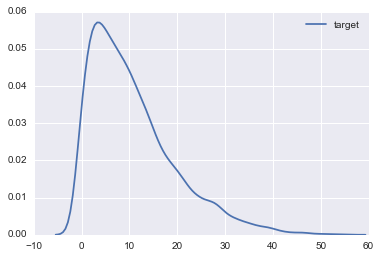

In [211]:
sns.kdeplot(frame.target)
print stats.normaltest(np.array(frame.target), nan_policy= "omit")

NormaltestResult(statistic=14.175089865941137, pvalue=0.00083544592564857112)
21


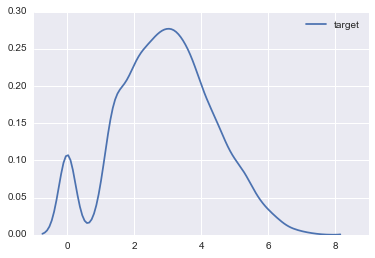

In [283]:
sqrt = np.sqrt(frame.target)
sns.kdeplot(sqrt)

print stats.normaltest(sqrt, nan_policy= "omit")
print sum(sqrt.isnull())

NormaltestResult(statistic=5015.8458552392867, pvalue=0.0)
21


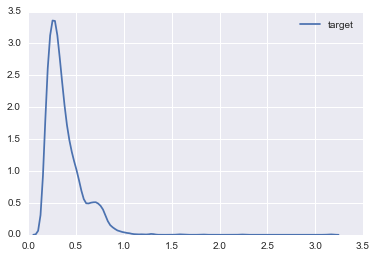

In [267]:
inv_sqrt = 1/np.sqrt(frame.target)
sns.kdeplot(inv_sqrt)

print stats.normaltest(inv_sqrt, nan_policy= "omit")
print sum(inv_sqrt.isnull())

NormaltestResult(statistic=271.28992876837242, pvalue=1.2306667583390058e-59)
21


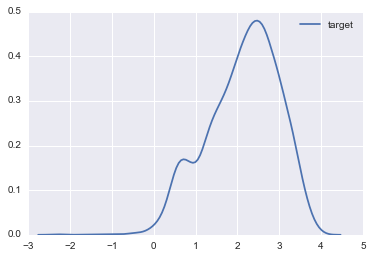

In [271]:
log_xform = np.log(frame.target)

sns.kdeplot(log_xform)
print stats.normaltest(log_xform, nan_policy= "omit")
print sum(log_xform.isnull())

NormaltestResult(statistic=5281.0999131797253, pvalue=0.0)

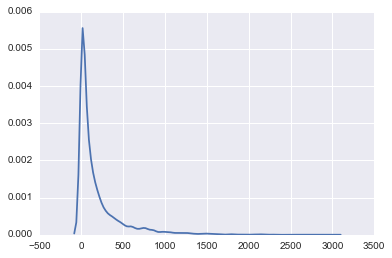

In [215]:
squared = np.array(frame.target)**2
sns.kdeplot(squared)

stats.normaltest(squared, nan_policy= "omit")


NormaltestResult(statistic=269.87494039257626, pvalue=2.4969008187899396e-59)
0


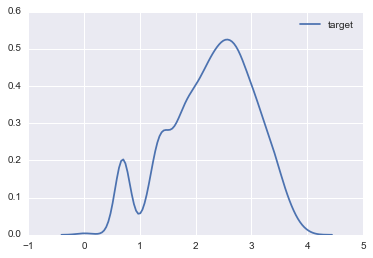

In [281]:
logshift=np.log(frame.target+2)

sns.kdeplot(log_shift)
print stats.normaltest(log_shift, nan_policy= "omit")
print sum(log_shift.isnull())

#### Looks like the sqrt transformation works the best so lets try that again to see if the results are better.

In [16]:
trans_y = np.sqrt(y)
trans_X = X[~trans_y.isnull()]
trans_y.dropna(inplace=1)

In [17]:
trans_ss = ShuffleSplit(len(trans_X), 5)

In [293]:


cv_result =  cross_val_score(et4, trans_X, trans_y, cv = trans_ss, n_jobs=-1)
print cv_result.mean()
print cv_result.std()

0.21851714145
0.019842974655


In [20]:
en3 = ElasticNetCV(selection = "random")
cv_result =  cross_val_score(en3, trans_X, trans_y, cv = trans_ss)
print cv_result.mean()
print cv_result.std()

/Users/egorkharakozov/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


0.24030770182
0.0174748626391


   #### try one last thing and use a robust scaler on the response variable to see if it can negate the effect of the outliers which I expect to be a big driver for this data set.

In [54]:
rs = RobustScaler()
trans_y2 = rs.fit_transform(y.reshape(-1,1))

In [55]:
np.shape(X)

(7823, 1520)

In [57]:

cv_result =  cross_val_score(et4, X, trans_y2.ravel(), cv = ss2, n_jobs=-1)
print cv_result.mean()
print cv_result.std()

0.215224074777
0.0286320008105


In [58]:
et4.fit(X, trans_y2.ravel())

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=7,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=30,
          min_samples_split=2, min_weight_fraction_leaf=0.137404197501,
          n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, trans_y2.ravel(), test_size=0.4, random_state = 42)

In [60]:
et4.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=7,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=30,
          min_samples_split=2, min_weight_fraction_leaf=0.137404197501,
          n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)

In [61]:
y_pred = et4.predict(X_test)

In [62]:
r2_score(y_test, y_pred)

0.21841843239299918

#### For the actual prediction, in the next notebook, I will go with the Etra Tree model with the hyperparameters that I Grid Searched for. At the end of the day, the actual prediction accuracy is not as important as the ordinal ranking by position by week that is generated by the model. 
